In [ ]:
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import astropy.stats
import astropy.table
from astropy.table import join
import astropy.wcs
import astropy.cosmology
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import ascii
import scipy.integrate as integrate
import scipy.optimize as optimize
from astropy.cosmology import FlatLambdaCDM

In [ ]:
li=ascii.read(r"/content/Li data.txt")
li

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,str4,float64,float64,float64,float64,float64
34,3.591921,-30.41574,2.07,7.72,-0.14,0.19,0.33,-0.04,0.05,2.82,0.15,0.87,0.03,0.85,0.02,8.03,0.02,3.04
245,3.599965,-30.40957,1.81,7.78,-0.17,0.19,0.39,-0.08,0.06,0.47,0.05,1.60,0.89,1.02,0.11,7.6,0.52,6.29
282,3.577672,-30.408856,2.26,7.05,-0.09,0.09,0.01,-0.01,0.01,0.45,0.06,0.69,0.05,0.48,0.03,8.13,0.03,2.31
614,3.618857,-30.403802,2.2,7.11,-0.08,0.08,0.19,-0.04,0.04,1.24,0.25,0.86,0.13,1.15,0.28,8.03,0.08,1.0
882,3.602338,-30.400736,1.81,8.58,-0.15,0.16,0.2,-0.04,0.08,0.64,0.08,0.04,0.08,0.63,0.08,8.52,0.05,2.23
1018,3.606238,-30.397984,2.28,6.89,-0.17,0.24,0.12,-0.03,0.05,1.05,0.1,1.68,0.61,0.8,0.07,7.55,0.36,1.78
1085,3.604176,-30.39717,2.07,9.37,-0.2,0.15,0.38,-0.04,0.05,3.93,0.26,0.16,0.03,0.75,0.09,8.44,0.02,1.85
1333,3.606056,-30.393533,2.18,8.42,-0.25,0.18,0.3,-0.07,0.09,1.48,0.16,0.80,0.06,1.13,0.11,8.07,0.03,1.68
1407,3.611638,-30.392479,2.28,7.45,-0.3,0.3,0.13,-0.03,0.04,0.86,0.08,1.03,0.10,1.05,0.09,7.93,0.06,1.53


In [ ]:
Li_data = astropy.table.Table({'ID': li['col1'],
                                  'R.A': li['col2'],
                                  'D.E': li['col3'],
                                  'Z': li['col4'],
                                  'logMstar':li['col5'],
                                  'e_Mstar':((-1*li['col6']+li['col7'])/2),
                                  'logSFR':li['col11'],
                                  'e_logSFR':li['col12']})


Li_data



ID,R.A,D.E,Z,logMstar,e_Mstar,logSFR,e_logSFR
int64,float64,float64,float64,float64,float64,float64,float64
34,3.591921,-30.41574,2.07,7.72,0.165,2.82,0.15
245,3.599965,-30.40957,1.81,7.78,0.18,0.47,0.05
282,3.577672,-30.408856,2.26,7.05,0.09,0.45,0.06
614,3.618857,-30.403802,2.2,7.11,0.08,1.24,0.25
882,3.602338,-30.400736,1.81,8.58,0.155,0.64,0.08
1018,3.606238,-30.397984,2.28,6.89,0.20500000000000002,1.05,0.1
1085,3.604176,-30.39717,2.07,9.37,0.175,3.93,0.26
1333,3.606056,-30.393533,2.18,8.42,0.215,1.48,0.16
1407,3.611638,-30.392479,2.28,7.45,0.3,0.86,0.08


In [ ]:
high=Li_data[Li_data['Z']<(2.5)]
high

logMstar_mean = np.mean(high['logMstar'])
logMstar_std = np.std(high['logMstar'])


logSFR_mean = np.mean(high['logSFR'])
logSFR_std = np.std(high['logSFR'])

e_logSFR_mean = np.mean(high['e_logSFR'])
e_logSFR_std = np.std(high['e_logSFR'])

high['logMstar_norm'] = (high['logMstar'] - logMstar_mean) / logMstar_std
high['logSFR_norm'] = (high['logSFR'] - logSFR_mean) / logSFR_std
high['e_logSFR_norm'] = (high['e_logSFR'] - e_logSFR_mean) / e_logSFR_std

flux=ascii.read(r"/content/li3.txt")
flux

ha=flux['col1']*2.86
high['Fha']=ha
high
sfr_dash=(-55.0)+np.log10(4.6*high['Fha'])#taking flux in erg s-1 m-2
high['logSFR_dash']=sfr_dash
high
logSFRd_mean = np.mean(high['logSFR_dash'])
logSFRd_std = np.std(high['logSFR_dash'])
high['logSFR_dash_norm'] = (high['logSFR_dash'] - logSFRd_mean) / logSFRd_std
high


ID,R.A,D.E,Z,logMstar,e_Mstar,logSFR,e_logSFR,logMstar_norm,logSFR_norm,e_logSFR_norm,Fha,logSFR_dash,logSFR_dash_norm
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
34,3.591921,-30.41574,2.07,7.72,0.165,2.82,0.15,-0.044993904245713486,0.6084373512747542,0.24789946929378817,11.783199999999999,-53.26597891915625,1.3041549493658418
245,3.599965,-30.40957,1.81,7.78,0.18,0.47,0.05,0.025773207286377883,-0.7329577126023532,-0.9061153015566045,5.2624,-53.616058312179845,0.3930373685734296
282,3.577672,-30.408856,2.26,7.05,0.09,0.45,0.06,-0.8352266496873938,-0.7443738408055627,-0.7907138244715652,1.6587999999999998,-54.11744814162645,-0.9118811657446233
614,3.618857,-30.403802,2.2,7.11,0.08,1.24,0.25,-0.7644595381553024,-0.2934367767787903,1.4019142401441809,1.716,-54.10272488480574,-0.8735623774834551
882,3.602338,-30.400736,1.81,8.58,0.155,0.64,0.08,0.9693346943809215,-0.6359206228750731,-0.5599108703014867,3.146,-53.83948345003116,-0.18844950310193076
1018,3.606238,-30.397984,2.28,6.89,0.20500000000000002,1.05,0.1,-1.0239389471063027,-0.40188999470927983,-0.32910791613140805,2.5454,-53.93148612854447,-0.42789592452502423
1085,3.604176,-30.39717,2.07,9.37,0.175,3.93,0.26,1.9011016628867825,1.2420324665528777,1.5173157172292204,9.4094,-53.36368023723941,1.0498772330931831
1333,3.606056,-30.393533,2.18,8.42,0.215,1.48,0.16,0.7806223969620125,-0.1564432383402772,0.36330094637882754,3.1174,-53.84344963724876,-0.19877191274580747
1407,3.611638,-30.392479,2.28,7.45,0.3,0.86,0.08,-0.3634459061401215,-0.5103432126397695,-0.5599108703014867,1.7731999999999999,-54.08848444569113,-0.8365001718978516


In [ ]:
low=Li_data[Li_data['Z']>=(2.5)]
low

logMstar_mean = np.mean(low['logMstar'])
logMstar_std = np.std(low['logMstar'])


logSFR_mean = np.mean(low['logSFR'])
logSFR_std = np.std(low['logSFR'])

e_logSFR_mean = np.mean(low['e_logSFR'])
e_logSFR_std = np.std(low['e_logSFR'])

low['logMstar_norm'] = (low['logMstar'] - logMstar_mean) / logMstar_std
low['logSFR_norm'] = (low['logSFR'] - logSFR_mean) / logSFR_std
low['e_logSFR_norm'] = (low['e_logSFR'] - e_logSFR_mean) / e_logSFR_std

flux=ascii.read(r"/content/li2.txt")
flux
ha=flux['col4']*2.86
low['Fha']=ha
low
sfr_dash=(-55.0)+np.log10(4.6*low['Fha'])#taking flux in erg s-1 m-2
low['logSFR_dash']=sfr_dash
low
logSFRd_mean = np.mean(low['logSFR_dash'])
logSFRd_std = np.std(low['logSFR_dash'])
low['logSFR_dash_norm'] = (low['logSFR_dash'] - logSFRd_mean) / logSFRd_std
low


ID,R.A,D.E,Z,logMstar,e_Mstar,logSFR,e_logSFR,logMstar_norm,logSFR_norm,e_logSFR_norm,Fha,logSFR_dash,logSFR_dash_norm
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
50,110.821398,-73.474602,2.98,8.78,0.08,8.66,1.42,0.49050645135195603,-0.04966584307507292,0.7674325615245319,2.2022,-53.9943854100169,-0.034839194868657705
1347,110.823498,-73.44444,3.37,8.22,0.065,14.0,1.28,-0.18356376400287958,0.43108751406249163,0.5650327650785016,4.089799999999999,-53.72554009772432,0.7106586896959212
1361,110.859711,-73.444213,2.73,9.01,0.07500000000000001,6.27,0.99,0.7673567183726933,-0.2648344804456309,0.14577604386886714,3.3747999999999996,-53.80899412788326,0.47924381989090076
1424,110.828726,-73.442593,3.1,9.59,0.04,47.29,1.63,1.4655008699902032,3.4281435550942376,1.0710322561935774,13.499199999999998,-53.2069341365553,2.148733408861303
1475,110.863244,-73.441489,2.73,8.33,0.105,2.9,0.51,-0.05115711455818012,-0.568231262009974,-0.5481661153746656,1.3156,-54.21811830350781,-0.6552420480285513
1491,110.859274,-73.44123,2.73,9.83,0.035,9.45,1.18,1.7543881051422765,0.02145684459134573,0.4204614819027655,4.4044,-53.69335541435292,0.7999055996165434
1520,110.850517,-73.440461,3.04,7.71,0.11,6.77,0.9,-0.7974491387010356,-0.21982012116308738,0.015661889010704776,2.4596,-53.94637768394581,0.09828441410766184
404,3.61346,-30.40686,2.85,6.84,0.07,2.56,0.35,-1.8446653661273007,-0.5988410263221036,-0.7794801684558433,1.2584,-54.2374234587032,-0.7087745133582478
434,3.607437,-30.406471,3.2,9.25,0.32999999999999996,6.79,1.03,1.0562439535247665,-0.21801954679178562,0.2036045571391616,2.288,-53.97778614819744,0.011189930453331902


In [ ]:
url = r"https://iopscience.iop.org/2041-8205/955/1/L18/suppdata/apjlacf470t2_ascii.txt?doi=10.3847/2041-8213/acf470"
morishita=ascii.read(r"/content/morishita_data.txt")

morishita


Subset,Name,RAdeg,DEdeg,UVmag,z,e_z,E_z,MUVmag,e_MUVmag,E_MUVmag,logMstar,e_logMstar,E_logMstar,logSFR,e_logSFR,E_logSFR,betaUV,e_betaUV,E_betaUV,logRe,e_logRe,E_logRe,l_OIIIHb,OIIIHb,e_OIIIHb,fgal,fcom
,,deg,deg,mag,,,,mag,mag,mag,dex(Msun),dex(Msun),dex(Msun),dex(Msun / yr),dex(Msun / yr),dex(Msun / yr),,,,dex(kpc),dex(kpc),dex(kpc),,dex(---),dex(---),,
str13,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,str1
F070W-dropout,J1235-2632,188.92749,4.8717985,26.7,6.0,0.2,0.1,-19.9,0.1,0.1,8.7,0.8,0.8,0.8,0.1,0.1,-2.7,0.1,0.1,-0.61,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-2875,188.94112,4.868082,27.0,6.4,0.2,0.1,-19.9,0.1,0.1,9.2,0.1,0.1,0.8,0.1,0.1,-2.4,0.1,0.2,-0.65,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-3021,188.93146,4.8745794,27.3,6.0,0.2,0.2,-19.3,0.1,0.1,7.9,0.1,0.1,0.6,0.1,0.1,-2.5,0.1,0.1,-0.56,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-3236,188.95332,4.8656316,27.2,6.8,0.2,0.2,-20.1,0.1,0.1,8.7,0.1,0.1,0.7,0.1,0.1,-2.2,0.1,0.1,-0.9,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-4628,188.96568,4.8757343,25.7,5.2,0.1,0.1,-21.0,0.1,0.1,9.9,0.1,0.1,1.6,0.1,0.1,-1.6,0.1,0.1,-0.27,0.02,0.02,--,--,--,0,0
F070W-dropout,J1235-4644,188.9286,4.8941765,27.0,6.3,0.2,0.2,-18.9,0.4,0.3,10.0,0.3,0.3,1.9,0.3,0.3,-0.6,0.2,0.5,-0.46,0.03,0.03,--,--,--,0,0
F070W-dropout,J1235-5704,188.94789,4.8993416,26.7,6.6,0.1,0.1,-21.5,0.1,0.1,8.8,0.5,0.5,0.9,0.1,0.1,-2.5,0.2,0.2,-0.84,0.01,0.01,--,--,--,0,0
F070W-dropout,J1235-7600,188.94092,4.915246,26.5,5.7,0.2,0.2,-20.1,0.1,0.1,9.4,0.1,0.1,0.9,0.1,0.1,-2.4,0.1,0.1,0.08,0.02,0.02,--,--,--,0,0


In [ ]:
y=morishita['logSFR']
x=morishita['logMstar']
co_low=morishita['e_logSFR']
co_high=morishita['E_logSFR']
co=((co_low)+(co_high))/2
small=morishita[morishita['MUVmag']>(-19)]
big=morishita[morishita['MUVmag']<=(-19)]
small

Subset,Name,RAdeg,DEdeg,UVmag,z,e_z,E_z,MUVmag,e_MUVmag,E_MUVmag,logMstar,e_logMstar,E_logMstar,logSFR,e_logSFR,E_logSFR,betaUV,e_betaUV,E_betaUV,logRe,e_logRe,E_logRe,l_OIIIHb,OIIIHb,e_OIIIHb,fgal,fcom
,,deg,deg,mag,,,,mag,mag,mag,dex(Msun),dex(Msun),dex(Msun),dex(Msun / yr),dex(Msun / yr),dex(Msun / yr),,,,dex(kpc),dex(kpc),dex(kpc),,dex(---),dex(---),,
str13,str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str1,float64,float64,str1,str1
F070W-dropout,J1235-4644,188.9286,4.8941765,27.0,6.3,0.2,0.2,-18.9,0.4,0.3,10.0,0.3,0.3,1.9,0.3,0.3,-0.6,0.2,0.5,-0.46,0.03,0.03,--,--,--,0,0
F070W-dropout,J1235-14339,188.97955,4.9459105,27.3,6.0,0.2,0.3,-18.7,0.1,0.1,8.1,0.2,0.2,0.6,0.1,0.1,-2.4,0.1,0.1,-0.07,0.1,0.1,--,--,--,0,0
F070W-dropout,J1235-20019,188.99167,4.9734235,27.4,6.8,0.2,0.1,-18.8,0.2,0.1,9.5,0.1,0.1,0.7,0.2,0.2,-1.9,0.2,0.2,-0.59,0.02,0.02,--,--,--,0,0
F070W-dropout,A2744-6031,3.5769939,-30.415525,27.1,5.13,--,--,-18.8,0.1,0.1,8.7,0.1,0.1,0.5,0.1,0.1,-1.9,0.1,0.1,0.05,0.06,0.06,--,--,--,1,--
F070W-dropout,A2744-7284,3.5879247,-30.411587,29.4,5.28,--,--,-17.9,0.1,0.1,7.8,0.2,0.2,-0.2,0.2,0.2,-2.0,0.2,0.3,-0.93,0.6,0.6,--,0.5,0.1,0,0
F070W-dropout,A2744-7728,3.6006,-30.410273,29.9,6.38,--,--,-16.9,0.1,0.1,7.1,0.3,0.3,-0.4,0.1,0.1,-2.6,0.2,0.2,-1.39,0.22,0.22,--,0.5,0.3,0,1
F070W-dropout,A2744-7965,3.5965643,-30.40897,29.2,5.28,--,--,-16.5,0.1,0.1,8.0,0.2,0.2,-0.1,0.3,0.3,-1.9,0.3,0.2,-0.81,0.5,0.5,--,--,--,0,0
F070W-dropout,A2744-9421,3.6000569,-30.404362,28.8,5.28,--,--,-17.6,0.1,0.1,7.8,0.1,0.1,-0.1,0.1,0.1,-2.2,0.1,0.1,-0.66,0.1,0.1,--,--,--,0,0


In [ ]:
small_data = astropy.table.Table({'Name': small['Name'],
                                  'UVmag': small['UVmag'],
                                  'z': small['z'],
                                  'e_z':((small['e_z']+small['E_z'])/2),
                                  'MUVmag':small['MUVmag'],
                                  'e_MUVmag':((small['e_MUVmag']+small['E_MUVmag'])/2),
                                  'logMstar':small['logMstar'],
                                  'e_logMstar':((small['e_logMstar']+small['E_logMstar'])/2),
                                  'logSFR':small['logSFR'],
                                  'betaUV':small['betaUV'],
                                  'e_logSFR':((small['e_logSFR']+small['E_logSFR'])/2)})
SFR_dash=(-24)-((0.4)*(small_data['UVmag']+48.6-4.43-(1.99*small_data['betaUV'])))+np.log10(1.4)
#SFR_dash=(-24)-((0.4)*(small_data['UVmag']+48.6))+np.log10(1.4)
small_data.add_column(SFR_dash,name='logSFR_dash')
Mstar_dash=small_data['logMstar']-(small_data['logSFR']-small_data['logSFR_dash'])
small_data.add_column(Mstar_dash,name='logMStar_dash')

small_data

Name,UVmag,z,e_z,MUVmag,e_MUVmag,logMstar,e_logMstar,logSFR,betaUV,e_logSFR,logSFR_dash,logMStar_dash
,mag,,,mag,mag,dex(Msun),dex(Msun),dex(Msun / yr),,dex(Msun / yr),mag,dex(Msun)
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1235-4644,27.0,6.3,0.2,-18.9,0.35,10.0,0.3,1.9,-0.6,0.3,-52.79947196432176,-44.69947196432176
J1235-14339,27.3,6.0,0.25,-18.7,0.1,8.1,0.2,0.6,-2.4,0.1,-54.352271964321766,-46.852271964321766
J1235-20019,27.4,6.8,0.15000000000000002,-18.8,0.15000000000000002,9.5,0.1,0.7,-1.9,0.2,-53.99427196432176,-45.194271964321764
A2744-6031,27.1,5.13,--,-18.8,0.1,8.7,0.1,0.5,-1.9,0.1,-53.87427196432177,-45.674271964321775
A2744-7284,29.4,5.28,--,-17.9,0.1,7.8,0.2,-0.2,-2.0,0.2,-54.87387196432176,-46.87387196432176
A2744-7728,29.9,6.38,--,-16.9,0.1,7.1,0.3,-0.4,-2.6,0.1,-55.55147196432176,-48.05147196432176
A2744-7965,29.2,5.28,--,-16.5,0.1,8.0,0.2,-0.1,-1.9,0.3,-54.71427196432177,-46.614271964321766
A2744-9421,28.8,5.28,--,-17.6,0.1,7.8,0.1,-0.1,-2.2,0.1,-54.79307196432176,-46.89307196432176


In [ ]:
big_data = astropy.table.Table({'Name': big['Name'],
                                  'UVmag': big['UVmag'],
                                  'z': big['z'],
                                  'e_z':((big['e_z']+big['E_z'])/2),
                                  'MUVmag':big['MUVmag'],
                                  'e_MUVmag':((big['e_MUVmag']+big['E_MUVmag'])/2),
                                  'logMstar':big['logMstar'],
                                  'e_logMstar':((big['e_logMstar']+big['E_logMstar'])/2),
                                  'logSFR':big['logSFR'],
                                  'betaUV':big['betaUV'],
                                  'e_logSFR':((big['e_logSFR']+big['E_logSFR'])/2)})
SFR_dash=(-24)-((0.4)*(big_data['UVmag']+48.6-4.43-(1.99*big_data['betaUV'])))+np.log10(1.4)
big_data.add_column(SFR_dash,name='logSFR_dash')
Mstar_dash=big_data['logMstar']-(big_data['logSFR']-big_data['logSFR_dash'])
big_data.add_column(Mstar_dash,name='logMStar_dash')

big_data

Name,UVmag,z,e_z,MUVmag,e_MUVmag,logMstar,e_logMstar,logSFR,betaUV,e_logSFR,logSFR_dash,logMStar_dash
,mag,,,mag,mag,dex(Msun),dex(Msun),dex(Msun / yr),,dex(Msun / yr),mag,dex(Msun)
str16,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
J1235-2632,26.7,6.0,0.15000000000000002,-19.9,0.1,8.7,0.8,0.8,-2.7,0.1,-54.35107196432177,-46.45107196432177
J1235-2875,27.0,6.4,0.15000000000000002,-19.9,0.1,9.2,0.1,0.8,-2.4,0.1,-54.23227196432176,-45.83227196432176
J1235-3021,27.3,6.0,0.2,-19.3,0.1,7.9,0.1,0.6,-2.5,0.1,-54.431871964321765,-47.13187196432177
J1235-3236,27.2,6.8,0.2,-20.1,0.1,8.7,0.1,0.7,-2.2,0.1,-54.15307196432176,-46.15307196432177
J1235-4628,25.7,5.2,0.1,-21.0,0.1,9.9,0.1,1.6,-1.6,0.1,-53.075471964321764,-44.77547196432177
J1235-5704,26.7,6.6,0.1,-21.5,0.1,8.8,0.5,0.9,-2.5,0.1,-54.19187196432176,-46.29187196432176
J1235-7600,26.5,5.7,0.2,-20.1,0.1,9.4,0.1,0.9,-2.4,0.1,-54.03227196432176,-45.53227196432176
J1235-8122,27.6,5.2,0.1,-19.0,0.1,8.6,0.1,0.4,-2.2,0.1,-54.31307196432177,-46.11307196432177


In [ ]:
def Dl_LCDM(z, Omega_m):
    c = 299792.458
    H0 = 70
    Ez_inv = lambda zp: 1.0 / np.sqrt(Omega_m * (1 + zp) ** 3 + (1 - Omega_m))
    integral, _ = integrate.quad(Ez_inv, 0, z)
    return (c / H0) * (1 + z) * integral*3.086*(10**22)

<Column name='logSFR_dash' dtype='float64' unit='mag' description='apparent UV magnitude' length=227>
  50.7963458544008
 51.02215425758517
49.809634890945645
 49.76637989837889
  47.7213219241179
 50.14222566189575
 50.71486494042251
 50.71218571149337
48.479900671676546
50.132724591942306
 49.81295715008185
 51.71191665469635
               ...
51.453622765635274
 50.85366601159768
49.695028137843536
 50.12867639230433
 48.25998435452338
50.416895255959844
50.528147382483716
  51.4195276746582
 48.83844303843985
47.355798096636505
 50.59821648737918

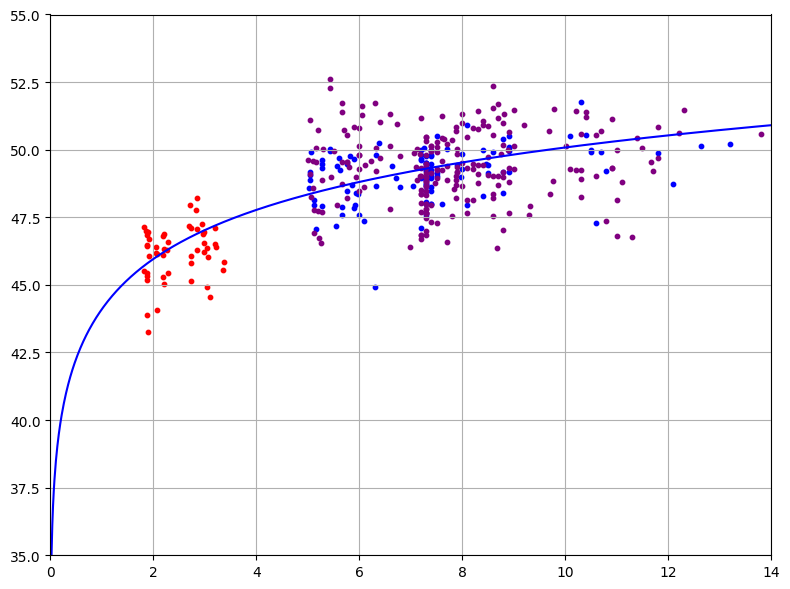

In [ ]:

plt.figure(figsize=(8, 6))

z_obs = high['Z']
DL_obs = np.array([Dl_LCDM(z, 0.307) for z in z_obs])
f=high['logSFR_dash']-(0.297*(high['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.622-(0.297-1)*np.log10(4*np.pi)
f=f-((0.297-1)*(44+np.log10(3.086**2)))
dm=(2.5*f/(0.297-1))+25
plt.scatter(z_obs,dm,color='red',s=10)

z_obs = low['Z']
DL_obs = np.array([Dl_LCDM(z, 0.302) for z in z_obs])
f=low['logSFR_dash']-(0.016*(low['logMstar']-np.log10(4*np.pi*DL_obs**2)))-0.562-(0.016-1)*np.log10(4*np.pi)
f=f-((0.016-1)*(44+np.log10(3.086**2)))
dm=(2.5*f/(0.016-1))+25
plt.scatter(z_obs,dm,color='red',s=10)




z_obs = small_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.313) for z in z_obs])
f=small_data['logSFR_dash']-( 0.23*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.63-( 0.23-1)*np.log10(4*np.pi)
f=small_data['logSFR']-np.log10(4*np.pi*DL_obs**2)-(0.23*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.63-(0.23-1)*np.log10(4*np.pi)
f=f-(( 0.23-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/( 0.23-1))+25
plt.scatter(z_obs,dm,color='blue',s=10)



z_obs = big_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.327) for z in z_obs])
f=big_data['logSFR_dash']-(0.398*(big_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.744-(0.398-1)*np.log10(4*np.pi)
#f=small_data['logSFR_dash']-(0.189*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+0.419-(0.180-1)*np.log10(4*np.pi)
f=f-((0.398-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/(0.398-1))+25
plt.scatter(z_obs,dm,color='purple',s=10)

H0 = 70  # Hubble constant in km/s/Mpc
Om0 = 0.3  # Matter density parameter
cosmo = FlatLambdaCDM(H0=H0, Om0=Om0)

# Generate redshift values
z = np.linspace(0.01, 14, 1000)  # Redshift range

# Calculate the distance modulus
distance_modulus = cosmo.distmod(z).value
plt.plot(z, distance_modulus, color='blue', label=r'$\Lambda$CDM')

plt.ylim(35, 55)
plt.xlim(0,14)
plt.grid(alpha=1)
plt.tight_layout()
dm


<Column name='logSFR_dash' dtype='float64' unit='mag' description='apparent UV magnitude' length=227>
  50.7963458544008
 51.02215425758517
49.809634890945645
 49.76637989837889
  47.7213219241179
 50.14222566189575
 50.71486494042251
 50.71218571149337
48.479900671676546
50.132724591942306
 49.81295715008185
 51.71191665469635
               ...
51.453622765635274
 50.85366601159768
49.695028137843536
 50.12867639230433
 48.25998435452338
50.416895255959844
50.528147382483716
  51.4195276746582
 48.83844303843985
47.355798096636505
 50.59821648737918

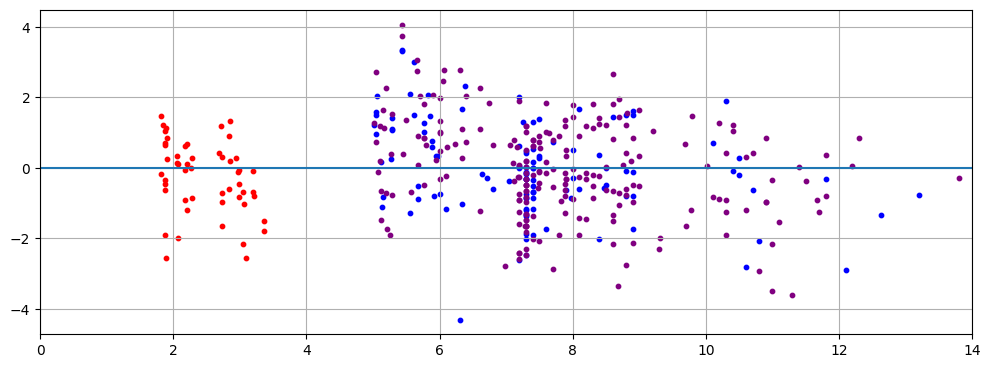

In [ ]:

plt.figure(figsize=(10.0104, 3.78125))

z_obs = high['Z']
DL_obs = np.array([Dl_LCDM(z, 0.307) for z in z_obs])
f=high['logSFR_dash']-(0.297*(high['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.622-(0.297-1)*np.log10(4*np.pi)
f=f-((0.297-1)*(44+np.log10(3.086**2)))
dm=(2.5*f/(0.297-1))+25
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
distance_modulus = cosmo.distmod(z_obs).value
residuals=dm-distance_modulus
plt.scatter(z_obs,residuals,color='red',s=10)

z_obs = low['Z']
DL_obs = np.array([Dl_LCDM(z, 0.302) for z in z_obs])
f=low['logSFR_dash']-(0.016*(low['logMstar']-np.log10(4*np.pi*DL_obs**2)))-0.562-(0.016-1)*np.log10(4*np.pi)
f=f-((0.016-1)*(44+np.log10(3.086**2)))
dm=(2.5*f/(0.016-1))+25
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
distance_modulus = cosmo.distmod(z_obs).value
residuals=dm-distance_modulus
plt.scatter(z_obs,residuals,color='red',s=10)




z_obs = small_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.317) for z in z_obs])
f=small_data['logSFR_dash']-(0.367*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.914-(0.367-1)*np.log10(4*np.pi)
#f=small_data['logSFR_dash']-(0.189*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+0.419-(0.180-1)*np.log10(4*np.pi)
f=f-((0.367-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/(0.367-1))+25
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
distance_modulus = cosmo.distmod(z_obs).value
residuals=dm-distance_modulus
plt.scatter(z_obs,residuals,color='blue',s=10)



z_obs = big_data['z']
DL_obs = np.array([Dl_LCDM(z, 0.327) for z in z_obs])
f=big_data['logSFR_dash']-(0.398*(big_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+1.744-(0.398-1)*np.log10(4*np.pi)
#f=small_data['logSFR_dash']-(0.189*(small_data['logMstar']-np.log10(4*np.pi*DL_obs**2)))+0.419-(0.180-1)*np.log10(4*np.pi)
f=f-((0.398-1)*(44+np.log10(3.086**2)))

dm=(2.5*f/(0.398-1))+25
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
distance_modulus = cosmo.distmod(z_obs).value
residuals=dm-distance_modulus
plt.scatter(z_obs,residuals,color='purple',s=10)


# Generate redshift values
z = np.linspace(0.01, 14, 1000)  # Redshift range

# Calculate the distance modulus

plt.plot(z,0*z)



#plt.ylim(-3, 2)
plt.xlim(0,14)
plt.grid(alpha=1)
plt.tight_layout()
dm
